In [49]:
import numpy as np
data = np.load("proyecto_training_data.npy")
b = int(len(data)*0.8)
print(data.shape)

data_train = data[0:b]
data_validate = data[b:len(data)]


#variable1
for i in range(0,6,1) :
    media= np.nanmean(data_train[:,i])
    valor_max=np.nanmax(data_train[:,i])
    valor_min=np.nanmin(data_train[:,i])
    ptp= np.ptp(data_train[:,i], axis=0)
    desv= np.nanstd(data_train[:,i])
    print("Variable:",i)
    print("media:",media,"maximo:",valor_max,"minimo:",valor_min,"desviacion est:",desv,"peak to peak:",ptp)






(1460, 6)
Variable: 0
media: 180590.27739726027 maximo: 755000.0 minimo: 34900.0 desviacion est: 78781.95108033362 peak to peak: 720100.0
Variable: 1
media: 6.101027397260274 maximo: 10.0 minimo: 1.0 desviacion est: 1.377435193240741 peak to peak: 9.0
Variable: 2
media: 1156.3236301369864 maximo: 3228.0 minimo: 334.0 desviacion est: 373.620331503586 peak to peak: 2894.0
Variable: 3
media: 6.4854452054794525 maximo: 14.0 minimo: 2.0 desviacion est: 1.6084517167387253 peak to peak: 12.0
Variable: 4
media: 1971.451198630137 maximo: 2010.0 minimo: 1875.0 desviacion est: 29.93888206867768 peak to peak: 135.0
Variable: 5
media: 69.94698544698545 maximo: 313.0 minimo: 21.0 desviacion est: 23.4659548199304 peak to peak: nan


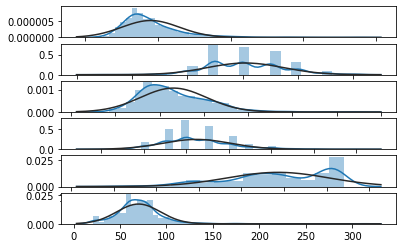

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

fig,axs = plt.subplots(nrows=6)
for i in range(6):
    
    sns.distplot(data_train[:,i], fit=norm, kde=True, ax=axs[i])    
    


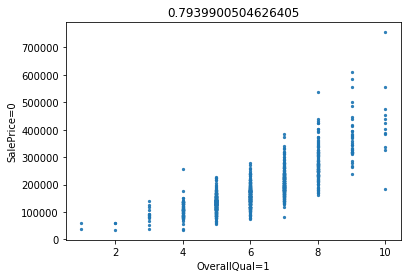

In [3]:
coef = np.ma.corrcoef(data_train[:,1], data_train[:,0])
plt.scatter(data_train[:,1], data_train[:,0],s=5,alpha=0.9)
plt.xlabel('OverallQual=1')
plt.ylabel('SalePrice=0')
plt.title(coef[0,1])
plt.show()

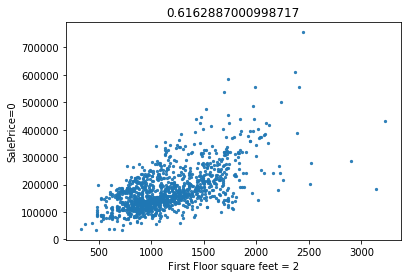

In [50]:
coef = np.ma.corrcoef(data_train[:,2], data_train[:,0])
plt.scatter(data_train[:,2], data_train[:,0],s=5,alpha=0.9)
plt.xlabel('First Floor square feet = 2')
plt.ylabel('SalePrice=0')
plt.title(coef[0,1])
plt.show()

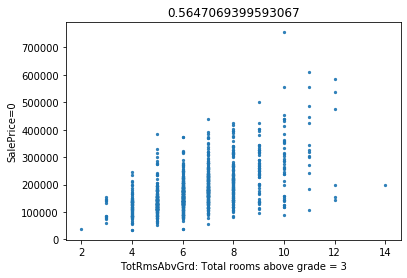

In [9]:
coef = np.ma.corrcoef(data_train[:,3], data_train[:,0])
plt.scatter(data_train[:,3], data_train[:,0],s=5,alpha=0.9)
plt.xlabel('TotRmsAbvGrd: Total rooms above grade = 3')
plt.ylabel('SalePrice=0')
plt.title(coef[0,1])
plt.show()

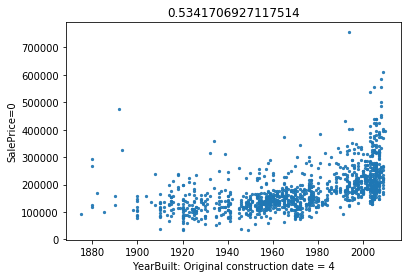

In [10]:
coef = np.ma.corrcoef(data_train[:,4], data_train[:,0])
plt.scatter(data_train[:,4], data_train[:,0],s=5,alpha=0.9)
plt.xlabel('YearBuilt: Original construction date = 4')
plt.ylabel('SalePrice=0')
plt.title(coef[0,1])
plt.show()

[[-- --]
 [-- 1.0]]


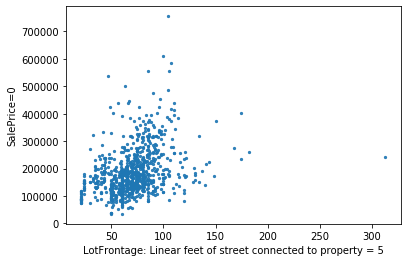

In [13]:
coef = np.ma.corrcoef(data_train[:,5], data_train[:,0])
print(coef)
plt.scatter(data_train[:,5], data_train[:,0],s=5,alpha=0.9)
plt.xlabel('LotFrontage: Linear feet of street connected to property = 5')
plt.ylabel('SalePrice=0')
plt.title(coef[0,1])
plt.show()

In [343]:
def r_lineal(x,y,epochs,lr):
    print(x)
    print(y)
    f_x = np.ones((len(x),2))
    f_x[:, 0] =  x    
    v_mb = np.zeros_like(f_x)    
    yhat = np.zeros(len(x))
    error = 0
    for o in range (0,epochs,1):
                
        for i in range(0,len(x),1):
            yhat[i] = np.dot(f_x[i,0],v_mb[i,0]) + np.dot(f_x[i,1],v_mb[i,1])
        g_m = np.nanmean((yhat-y)*x)
        g_b = np.nanmean((yhat-y))
        error = (0.5*np.nanmean(np.power((y-yhat),2)))
        v_mb[:, 0] = v_mb[:, 0] - (lr*g_m)
        v_mb[:, 1] = v_mb[:, 1] - (lr*g_b)
        #print("Iteracion:",o+1,g_m)
        #print("Iteracion:",o+1,g_b)
        
    
    
    
    #print(f_x[:,0])
    #print(v_mb[:,0])
    #print(f_x[:,1])
    #print(v_mb[:,1])        
    return v_mb,error  
         
x = data_train[0:3,5]
y = data_train[0:3,0]
epochs = 2
lr = 0.01

print(r_lineal(x,y/1000,epochs,lr))    

    

[65. 80. 68.]
[208.5 181.5 223.5]
(array([[-7044.447 ,   -98.3373],
       [-7044.447 ,   -98.3373],
       [-7044.447 ,   -98.3373]]), 50833906.76617501)
